<h1><font color = 'orange'> I. Logical thinking <font></h1>

<font color = 'blue'> <b> a. Các yêu cầu </font>

- Tú là một người bán hàng và đang muốn bán mĩ phẩm online trên website ABC.vn
- Tú muốn biết liệu công việc kinh doanh của mình trên ABC.vn có hiệu quả không (tổng số đơn hàng và doanh thu mà anh ta sẽ kiếm được thông qua website ABC.vn)
- Tú muốn được nhận sự tư vấn từ phía sàn thương mại điện tử ABC.vn (Hỗ trợ đưa ra quyết định có nên kinh doanh tại ABC.vn không, Hỗ trợ về các thông tin và thủ tục để bán hàng) 
    
<font color = 'blue'> <b> b. Giả định </font>    

1. Đật câu hỏi:
 Ta sử dụng hệ thống câu hỏi 5W1H để đặt vấn đề:
    - Who: Ai là người muốn bán Mĩ phẩm?, Ai là người muốn mua Mĩ phẩm?
    - What: Mặt hàng Tú muốn bán là gì?
    - How: Làm thế nào để Tú xong thủ tục đăng kí và bán được hàng của mình nhanh nhất? Làm thế nào để Tú có thể bán được mặt hàng của mình hiệu quả? Tú sẽ gặp các trở ngại nào khu mới bắt đầu, Doanh thu của Tú sau 6 tháng bán tại ABC.vn sẽ là bao nhiêu?
    - Where: Phân khúc khách hàng của Tú ở khoảng nào? Sản phẩm của Tú ở khoảng giá nào?
    - When: Khi nào thì Tú có thể bán được hàng sau khi hoàn tất thủ tục? Thời gian để Tú chuẩn bị upload nội dung sản phẩn đến khi bán được hàng là bao lâu? Khi nào Tú đạt được 100 đơn hàng đầu tiên?
    - Why: Tại sao người mua lại muốn mua mặt hàng của Tú hơn là các người bán khác? 
2. Tìm hiểu dữ liệu:
    - Để giúp Tú đưa ra quyết định ta truy cập kho dữ liệu của ABC.vn (lấy các thông tin về đơn hàng, mặt hàng, giá trị đơn hàng, v.v.)
    - Ta sẽ sử dụng bảng tính hoặc cơ sở dữ liệu để lọc filter, clean và transform dữ liệu từ cơ sở dữ liệu của ABC.vn
3. Xác định phương pháp phân tích:
    - Ta sẽ sử dụng phương pháp phân tích Diagnostic Analytics và dự đoán
4. Thực hiện phân tích:
    - Ta sử dụng PowerBI hay Python đển tiến hành phân tích dữ liệu đã có
5. Đưa ra kết luận:    
    - Dựa vào các mốc thời gian quan trọng của những người bán cùng ngành hàng với Tú ở trên Web ABC.vn (Ngày đăng ký, ngày đơn đăng ký của người bán hàng được phê duyệt, Ngày mà người bán hàng phát sinh giao dịch đầu tiên,..) để cho Tú thấy mức độ kinh doanh hiệu quả khi bán trên ABC.vn
    - Đưa ra một số giải pháp cho Tú như nên upload hình ảnh và nội dung về sản phẩm để bán hàng vào thời điểm nào, và làm thế nào để Tú có thể bán hàng được ngay sau khi upload nội dung về sản phẩm
    - Đưa ra các mức giá, đối tượng khách hàng, số lượng người bán có sản phẩm giống của Tú để hỗ trợ Tú đưa ra quyết định   
    - Sau các mốc 3, 6, 9, 12 tháng doanh thu và số lượng của Tú sẽ đạt được

<h1><font color = 'orange'> II. Case study <font></h1>


**Qua dữ liệu ta thấy một người bán hàng trên ABC.vn thường trải qua các bước sau:**
- Đăng ký-> Đợi phê duyệt tài khoản-> Listing sản phẩm (upload thông tin, hình ảnh) -> Chuẩn bị sản phẩm để sẵn sàng bán -> Phát sinh giao dịch


In [26]:
 #Metadata
df_metadata = pd.read_excel(r'D:\Data Analyst\Learn\MindX\BI12\Final_test\3.Logical thinking and mini case study\data_ecommerce_metadata.xlsx') # / kí tự đặt biệt raw/ rough (để r ở đầu) và file.csv ở cuối
df_metadata

,Dimension,Giải thích
0,Seller ID,Unique ID của mỗi người bán hàng (seller)
1,Seller's Main Category,Lĩnh vực kinh doanh chính của người bán hàng(m...
2,Sign-up Time,Thời gian mà người bán hàng đăng ký trên ABC.v...
3,Activation Time,Thời gian mà đơn đăng ký của người bán hàng đư...
4,1st Listing,Lần đầu tiên người bán hàng upload hình ảnh và...
5,1st Salable,Lần đầu tiên sản phẩm của người bán hàng bắt đ...
6,1st Transaction,Ngày mà người bán hàng phát sinh giao dịch đầu...


In [1]:
#import thư viện
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
print('Completed import lib')

Completed import lib


*Dựa vào các mốc thời gian đã có trong bảng dữ liệu ta tiến hành tính toán số ngày giữa các mốc thời gian của người bán trong bảng dữ liệu bàng excel sau đó import vào Python để phân tích:*

   - <b> phe duyet </b> (Thời gian chờ phê duyệt) = Activation Time - Sign-up Time 
   - **sau thu tuc** (Thời gian từ lúc đăng kí đến lúc bán được đơn đầu tiên) = 1st Transaction - Sign-up Time
   - **chuan bi** (Thời gian chuẩn bị sản phẩm để bán) = 1st Salable - 1st Listing
   - <b> san pham dau tien </b> (Thời gian bán được sản phẩm đầu tiên ) = 1st Transaction - 1st Salable
   
<đơn vị: Ngày>

In [27]:
#import dữ liệu 
df = pd.read_csv(r'D:\Data Analyst\Learn\MindX\BI12\Final_test\3.Logical thinking and mini case study\data_ecommerce_BBFF.csv') # / kí tự đặt biệt raw/ rough (để r ở đầu) và file.csv ở cuối

In [28]:
#Show dữ liệu
df.head(10)

,Seller ID,Sellers Main Category,Sign-up Time,Activation Time,1st Listing,1st Salable,1st Transaction,phe duyet,sau thu tuc,chuan bi,san pham dau tien
0,1,Electronic,9/20/2017,2/2/2018,2/7/2018,10/6/2018,10/10/2018,135,385,241,4
1,2,BBFF,8/19/2017,5/24/2018,8/13/2018,8/14/2018,9/2/2018,278,379,1,19
2,3,BBFF,12/4/2017,5/4/2018,10/6/2018,10/10/2018,10/12/2018,151,312,4,2
3,4,BBFF,10/16/2017,4/23/2018,7/4/2018,7/10/2018,7/10/2018,189,267,6,0
4,5,BBFF,12/13/2017,7/25/2018,8/30/2018,8/31/2018,9/14/2018,224,275,1,14
5,6,LifeStyle,1/4/2018,3/21/2018,6/11/2018,9/19/2018,9/20/2018,76,259,100,1
6,7,BBFF,1/26/2018,3/6/2018,10/1/2018,10/2/2018,10/14/2018,39,261,1,12
7,8,LifeStyle,11/29/2017,5/10/2018,7/26/2018,7/28/2018,8/4/2018,162,248,2,7
8,9,BBFF,11/28/2017,4/20/2018,7/23/2018,7/24/2018,8/12/2018,143,257,1,19
9,10,BBFF,2/2/2018,3/30/2018,3/30/2018,9/27/2018,9/30/2018,56,240,181,3


In [4]:
#Kiểm tra dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Seller ID              2145 non-null   int64 
 1   Sellers Main Category  2145 non-null   object
 2   Sign-up Time           2145 non-null   object
 3   Activation Time        2145 non-null   object
 4   1st Listing            2145 non-null   object
 5   1st Salable            2145 non-null   object
 6   1st Transaction        2145 non-null   object
 7   phe duyet              2145 non-null   int64 
 8   sau thu tuc            2145 non-null   int64 
 9   chuan bi               2145 non-null   int64 
 10  san pham dau tien      2145 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 184.5+ KB


In [29]:
#thống kê dữ liệu
df.describe()

,Seller ID,phe duyet,sau thu tuc,chuan bi,san pham dau tien
count,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000
mean,1073.000000,16.342191,51.762238,12.218182,11.131469
std,619.352484,23.741817,43.541961,20.501819,20.380166
min,1.000000,0.000000,1.000000,-2.000000,-9.000000
25%,537.000000,4.000000,22.000000,1.000000,1.000000
50%,1073.000000,8.000000,39.000000,5.000000,4.000000
75%,1609.000000,19.000000,69.000000,14.000000,12.000000
max,2145.000000,278.000000,385.000000,241.000000,193.000000


In [32]:
# Chỉ số tương quan
df.corr()

,Seller ID,phe duyet,sau thu tuc,chuan bi,san pham dau tien
Seller ID,1.000000,-0.499467,-0.742831,-0.447818,0.009057
phe duyet,-0.499467,1.000000,0.614339,0.160433,0.086578
sau thu tuc,-0.742831,0.614339,1.000000,0.438140,0.435293
chuan bi,-0.447818,0.160433,0.438140,1.000000,-0.060660
san pham dau tien,0.009057,0.086578,0.435293,-0.060660,1.000000


### 1. Ngành hàng được bán nhiều nhất trên ABC.vn

- Ngành hàng bán được nhiều nhất trên trang thương mại điện tử của ABC là BBFF
- ABC.vn là trang thương mại điện tử bán với các mặt hàng phổ biển là thời trang như BBFF và Life Style 

In [75]:
# Ngành hàng được bán nhiều nhất trên ABC.vn
df['Sellers Main Category'].value_counts()

BBFF               1130
LifeStyle           501
Electronic          262
Book                130
Digital Service     122
Name: Sellers Main Category, dtype: int64

Text(0.5, 0, 'Sellers Main Category')

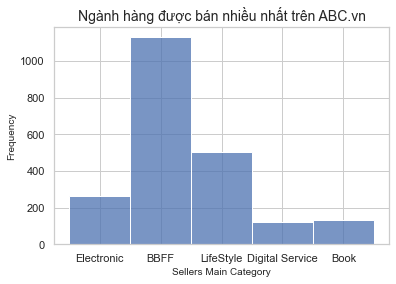

In [31]:
# Ngành hàng được bán nhiều nhất trên ABC.vn
sns.histplot(df['Sellers Main Category']) # distplot, histplot
sns.set_style('darkgrid')
plt.title('Ngành hàng được bán nhiều nhất trên ABC.vn', fontsize=14)
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('Sellers Main Category', fontsize=10)

### 2. Thời gian

<font color = 'blue'> <b> 2.1 Thời gian chuẩn bị sản phẩm để bán </font>

Text(0.5, 0.98, 'Thời gian chuẩn bị')

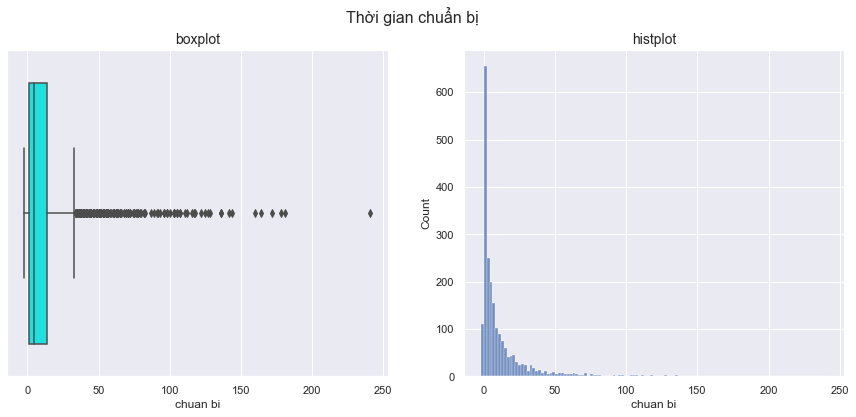

In [74]:
# Thời gian chuẩn bị sản phẩm để bán

#xác định vùng vẽ biểu đồ (1 hàng, 2 cột)
fig, axes = plt.subplots(1, 2, figsize=(15,6))

#create boxplot in each subplot
sns.boxplot(x = df['chuan bi'], color='cyan', ax=axes[0])
axes[0].set_title('boxplot', fontsize=14)
sns.histplot(df['chuan bi'], ax=axes[1])
axes[1].set_title('histplot', fontsize=14)
fig.suptitle('Thời gian chuẩn bị', fontsize=16)

In [44]:
#Thống kê
df['chuan bi'].describe()

count    2145.000000
mean       12.218182
std        20.501819
min        -2.000000
25%         1.000000
50%         5.000000
75%        14.000000
max       241.000000
Name: chuan bi, dtype: float64

- Từ biểu đồ trên ta có thể thấy Thời gian chuẩn bị trung bình của người bán từ lúc sản phẩm được listing cho đến lúc có thể bán được trong **khoảng 1 đến 14 ngày**
- Thời gian chuẩn bị thấp nhất là **-2 ngày** có thể do hệ thống tính toán ngày bị lỗi
- Thời gian chuẩn bị lâu nhất của người bán cho đến lúc sản phẩm có thể mua được lên đến **241 ngày**

<font color = 'blue'> <b> 2.2 Thời gian chờ phê duyệt </font>

Text(0.5, 0.98, 'Thời gian chờ phê duyệt')

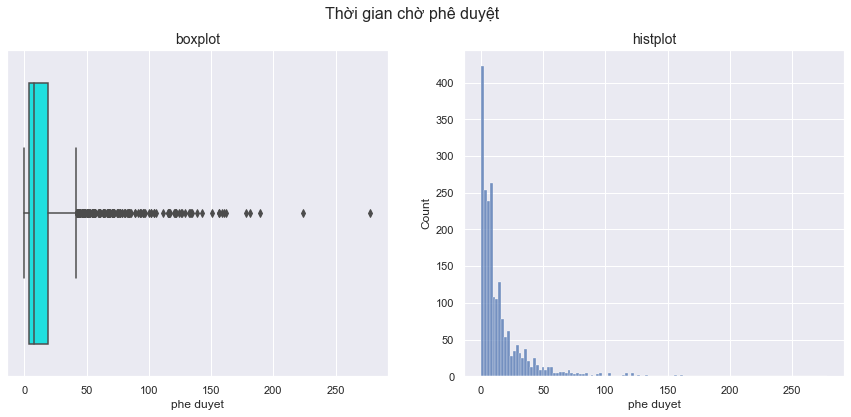

In [37]:
# Thời gian chờ phê duyệt

#xác định vùng vẽ biểu đồ (1 hàng, 2 cột)
fig, axes = plt.subplots(1, 2, figsize=(15,6))

#create boxplot in each subplot
sns.boxplot(x = df['phe duyet'], color='cyan', ax=axes[0])
axes[0].set_title('boxplot', fontsize=14)
sns.histplot(df['phe duyet'], ax=axes[1])
axes[1].set_title('histplot', fontsize=14)
fig.suptitle('Thời gian chờ phê duyệt', fontsize=16)

In [52]:
df['phe duyet'].describe() #thống kê

count    2145.000000
mean       16.342191
std        23.741817
min         0.000000
25%         4.000000
50%         8.000000
75%        19.000000
max       278.000000
Name: phe duyet, dtype: float64

- Thời gian gian từ lúc đăng ký cho đến lúc người bán được phê duyệt trong khoảng từ **4 ngày đến 19 ngày**.
- Thời gian ngắn nhất mà người bán phải đợi phê duyệt là **ngay trong ngày**.
- Thời gian lâu nhất mà người bán phải đợi phê duyệt là **278 ngày**.

<font color = 'blue'> <b> 2.3 Thời gian từ lúc đăng kí đến lúc bán được đơn đầu tiên </font>

Text(0.5, 0.98, 'Thời gian chuẩn bị')

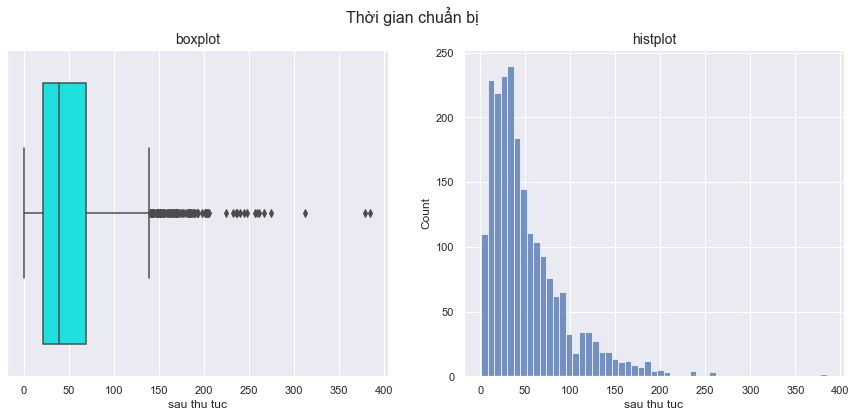

In [38]:
# Thời gian từ lúc đăng kí đến lúc bán được đơn đầu tiên

#xác định vùng vẽ biểu đồ (1 hàng, 2 cột)
fig, axes = plt.subplots(1, 2, figsize=(15,6))

#create boxplot in each subplot
sns.boxplot(x = df['sau thu tuc'], color='cyan', ax=axes[0])
axes[0].set_title('boxplot', fontsize=14)
sns.histplot(df['sau thu tuc'], ax=axes[1])
axes[1].set_title('histplot', fontsize=14)
fig.suptitle('Thời gian chuẩn bị', fontsize=16)

In [50]:
df['sau thu tuc'].describe() #thống kê

count    2145.000000
mean       51.762238
std        43.541961
min         1.000000
25%        22.000000
50%        39.000000
75%        69.000000
max       385.000000
Name: sau thu tuc, dtype: float64

- Thời gian mà người bán hoàn tất mọi thủ tục cho đến lúc có được đơn hàng đầu tiên vào khoảng từ **22 đến 69 ngày**
- Thời gian thấp nhất mà người bán hoàn tất mọi thủ tục là vào khoảng **1 ngày**
- Thời gian lâu nhất mà người bán hoàn tất mọi thủ tục lên đến hơn 1 năm cụ thể là **385 ngày**

<font color = 'blue'> <b> 2.4 Thời gian từ lúc đăng kí đến lúc bán được đơn đầu tiên </font>

Text(0.5, 0.98, 'Thời gian bán được sản phẩm đầu tiên')

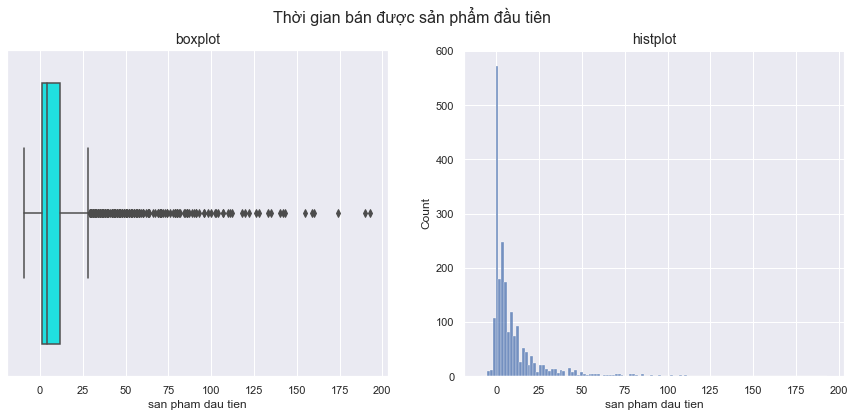

In [39]:
# Thời gian bán được sản phẩm đầu tiên

#xác định vùng vẽ biểu đồ (1 hàng, 2 cột)
fig, axes = plt.subplots(1, 2, figsize=(15,6))

#create boxplot in each subplot
sns.boxplot(x = df['san pham dau tien'], color='cyan', ax=axes[0])
axes[0].set_title('boxplot', fontsize=14)
sns.histplot(df['san pham dau tien'], ax=axes[1])
axes[1].set_title('histplot', fontsize=14)
fig.suptitle('Thời gian bán được sản phẩm đầu tiên', fontsize=16)

In [54]:
#thống kê
df['san pham dau tien'].describe()

count    2145.000000
mean       11.131469
std        20.380166
min        -9.000000
25%         1.000000
50%         4.000000
75%        12.000000
max       193.000000
Name: san pham dau tien, dtype: float64

- Thời gian từ lúc sản phẩm của người bán có thể mua được đến lúc có đơn hàng đầu tiên trong khoảng từ **1 đến 12 ngày*
- Thời gian sớm nhất từ lúc sản phẩm của người bán có thể mua được đến lúc có đơn hàng đầu tiên là **-9 ngày** (Có thể do hệ thống tính ngày bị lỗi hoặc do người bán đã listing sản phẩm và cho đặt trước ngày đến ngày mua được hàng)
- Thời gian lâu nhất từ lúc sản phẩm của người bán được phê duyệt đến lúc có được đơn hàng đầu tiên lên tới **193 ngày**

In [72]:
# Lọc ra thời gian phê duyệt lâu nhất từ đó ta thấy những ngày này thường ở vào nửa cuối năm 2017 và đầu 2018
df.sort_values('phe duyet', ascending=False).head(20)

,Seller ID,Sellers Main Category,Sign-up Time,Activation Time,1st Listing,1st Salable,1st Transaction,phe duyet,sau thu tuc,chuan bi,san pham dau tien
1,2,BBFF,8/19/2017,5/24/2018,8/13/2018,8/14/2018,9/2/2018,278,379,1,19
4,5,BBFF,12/13/2017,7/25/2018,8/30/2018,8/31/2018,9/14/2018,224,275,1,14
3,4,BBFF,10/16/2017,4/23/2018,7/4/2018,7/10/2018,7/10/2018,189,267,6,0
11,12,LifeStyle,10/12/2017,4/11/2018,4/27/2018,5/30/2018,6/6/2018,181,237,33,7
21,22,BBFF,2/2/2018,7/30/2018,7/31/2018,8/2/2018,8/5/2018,178,184,2,3
7,8,LifeStyle,11/29/2017,5/10/2018,7/26/2018,7/28/2018,8/4/2018,162,248,2,7
35,36,Electronic,4/26/2018,10/3/2018,10/9/2018,10/11/2018,10/18/2018,160,175,2,7
33,34,LifeStyle,4/19/2018,9/25/2018,9/26/2018,10/4/2018,10/5/2018,159,169,8,1
25,26,BBFF,11/28/2017,5/3/2018,5/23/2018,5/25/2018,7/19/2018,156,233,2,55
44,45,LifeStyle,4/18/2018,9/21/2018,9/13/2018,9/21/2018,10/4/2018,156,169,8,13


- Người bán trên Web ABC.vn trong đăng kí trong năm 2017 phải chờ đợi cho đến khi có được đơn hàng đầu tiên khá lâu có thể lên tới 278. Tuy nhiên vào năm 2018 thời gian chờ đợi đã giảm và người bán được phê duyệt nhanh hơn

### 3. Vấn đề của ABC.vn

- Thời gian chờ phê duyệt khá lâu từ **4 đến 19 ngày** từ lúc đăng kí và thời gian được phê duyệt sản phẩm là từ **1 đến 14 ngày**.
- Thời gian mà người bán làm hết thủ tục cho đến khi có được đơn hàng đầu tiên khá lâu từ **22 đến 69 ngày**.
- Hệ thống của ABC.vn đôi lúc bị lỗi khi ghi nhận thời gian âm tức là người bán chưa listing hoặc chưa được phê duyệt đã có người mua đơn hàng đó (ví dụ như Thời gian sớm nhất từ lúc sản phẩm của người bán có thể mua được đến lúc có đơn hàng đầu tiên là **-9 ngày** - hay Thời gian chuẩn bị là **-2 ngày**). 

### 4. Giải pháp cho ABC.vn

- Giảm thời gian phê duyệt cho người bán bảng một nửa so với thời gian hiện tại 
- Cải thiện hệ thống bán hàng để dữ liệu ghi lại được chính xác nhất
- Gửi email hoặc liên lạc qua điện thoại thông báo cho người bán nếu như thời gian phê duyệt đăng ký hay thời gian phê duyệt sản phẩm quá lâu.
- Thúc đẩy người bán bán bằng các chiến dịch CTA (Call to Action) như nhắc nhở, đưa ra những giải pháp qua email hoặc điện thoại để người bán hoàn thiện thủ tục đăng ký và listing sản phẩm nhanh hơn.
- Đưa ra những gợi ý, giải pháp cho người bán để thu hút người mua hàng để được nhiều đơn hàng hơn, nhiều đánh giá tốt hơn qua email hoặc điện thoại 